<a href="https://colab.research.google.com/github/RIDDHI1624/Drug-Discovery/blob/main/python/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [20]:
# Removed previous RDKit installation attempt

## **Load bioactivity data**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [25]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        # Check if the element is a string before processing
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
        else:
            mol = None # Set mol to None if the element is not a string

        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        if mol is None:
            continue # Skip the molecule if RDKit cannot read it or if the original element was not a string

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [21]:
# Removed bash cell with redundant function definition

### **Calculate descriptors**

In [22]:
!pip install rdkit-pypi

     |████████████████████████████████| 29.2 MB 190 kB/s 


In [26]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [27]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,299.286,1.11984,1.0,5.0
1,281.271,1.89262,0.0,5.0
2,415.589,3.81320,0.0,2.0
3,421.190,2.66050,0.0,4.0
4,403.175,3.76690,0.0,3.0
...,...,...,...,...
523,436.512,1.47440,3.0,4.0
524,496.583,2.73690,3.0,4.0
525,471.985,2.06450,2.0,4.0
526,465.594,2.19130,2.0,4.0


In [28]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL372889,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C(N)=O)ccc21,25.0,active
1,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive
2,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,active
3,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active
4,CHEMBL188484,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc(I)cc21,13.0,active
...,...,...,...,...
580,NaN,NaN,NaN,active
581,NaN,NaN,NaN,active
582,NaN,NaN,NaN,inactive
583,NaN,NaN,NaN,inactive


Now, let's combine the 2 DataFrame

In [29]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [30]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL372889,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C(N)=O)ccc21,25.0,active,299.286,1.11984,1.0,5.0
1,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive,281.271,1.89262,0.0,5.0
2,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,active,415.589,3.81320,0.0,2.0
3,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active,421.190,2.66050,0.0,4.0
4,CHEMBL188484,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc(I)cc21,13.0,active,403.175,3.76690,0.0,3.0
...,...,...,...,...,...,...,...,...
580,NaN,NaN,NaN,active,NaN,NaN,NaN,NaN
581,NaN,NaN,NaN,active,NaN,NaN,NaN,NaN
582,NaN,NaN,NaN,inactive,NaN,NaN,NaN,NaN
583,NaN,NaN,NaN,inactive,NaN,NaN,NaN,NaN


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [42]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1) # Corrected to use named axis argument

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [43]:
df_combined.standard_value.describe()

,standard_value
count,5.280000e+02
mean,3.618338e+04
std,1.372425e+05
min,2.200000e-03
25%,4.875000e+01
50%,1.600000e+03
75%,1.630000e+04
max,2.000000e+06


In [44]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [45]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [46]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1) # Corrected to use named axis argument

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [47]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL372889,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C(N)=O)ccc21,active,299.286,1.11984,1.0,5.0,25.0
1,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,7200.0
2,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,active,415.589,3.81320,0.0,2.0,9400.0
3,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,13500.0
4,CHEMBL188484,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc(I)cc21,active,403.175,3.76690,0.0,3.0,13.0
...,...,...,...,...,...,...,...,...
580,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
581,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
582,NaN,NaN,inactive,NaN,NaN,NaN,NaN,NaN
583,NaN,NaN,inactive,NaN,NaN,NaN,NaN,NaN


In [48]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,5.280000e+02
mean,3.618338e+04
std,1.372425e+05
min,2.200000e-03
25%,4.875000e+01
50%,1.600000e+03
75%,1.630000e+04
max,2.000000e+06


In [49]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL372889,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C(N)=O)ccc21,active,299.286,1.11984,1.0,5.0,7.602060
1,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,5.142668
2,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,active,415.589,3.81320,0.0,2.0,5.026872
3,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,4.869666
4,CHEMBL188484,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc(I)cc21,active,403.175,3.76690,0.0,3.0,7.886057
...,...,...,...,...,...,...,...,...
580,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
581,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
582,NaN,NaN,inactive,NaN,NaN,NaN,NaN,NaN
583,NaN,NaN,inactive,NaN,NaN,NaN,NaN,NaN


In [50]:
df_final.pIC50.describe()

,pIC50
count,528.000000
mean,5.996206
std,1.508727
min,2.698970
25%,4.787909
50%,5.795880
75%,7.312043
max,11.657577


### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [51]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL372889,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C(N)=O)ccc21,active,299.286,1.11984,1.0,5.0,7.602060
1,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,5.142668
2,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,active,415.589,3.81320,0.0,2.0,5.026872
3,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,4.869666
4,CHEMBL188484,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc(I)cc21,active,403.175,3.76690,0.0,3.0,7.886057
...,...,...,...,...,...,...,...,...
580,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
581,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
582,NaN,NaN,inactive,NaN,NaN,NaN,NaN,NaN
583,NaN,NaN,inactive,NaN,NaN,NaN,NaN,NaN


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [52]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

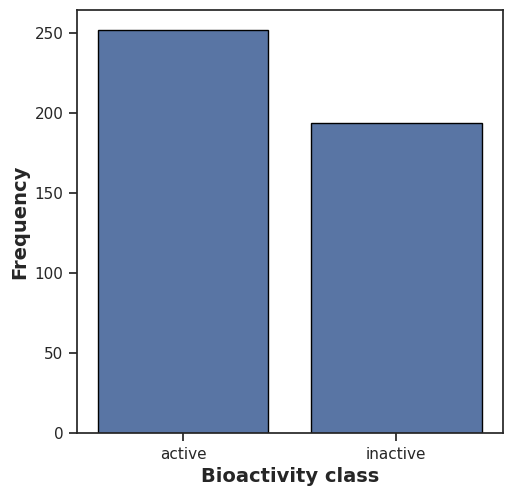

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

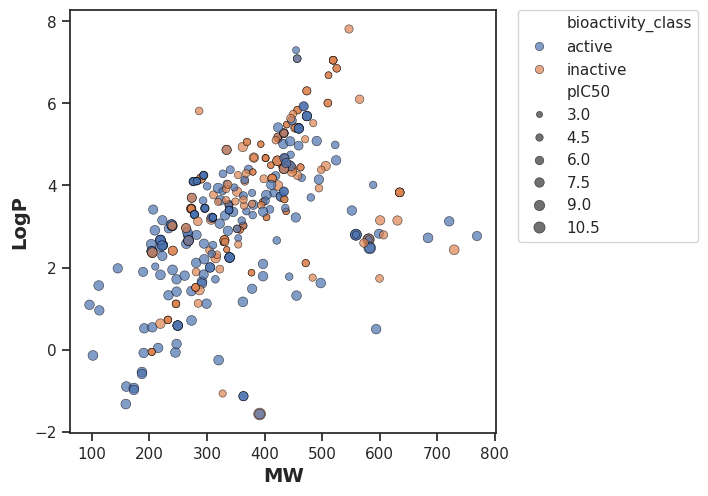

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

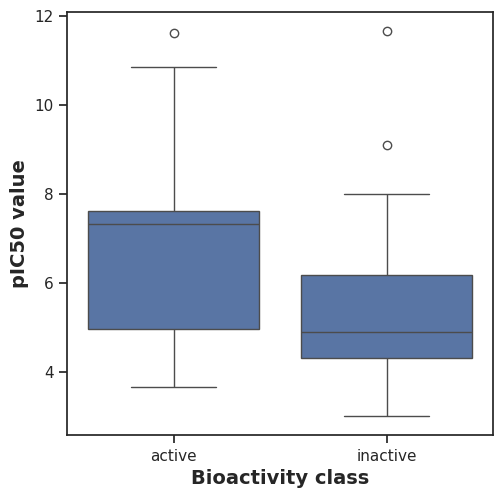

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [56]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [57]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


#### **MW**

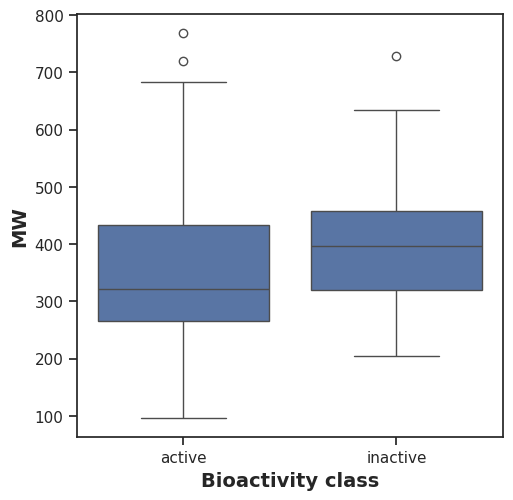

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [59]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,NaN,NaN,0.05,Different distribution (reject H0)


#### **LogP**

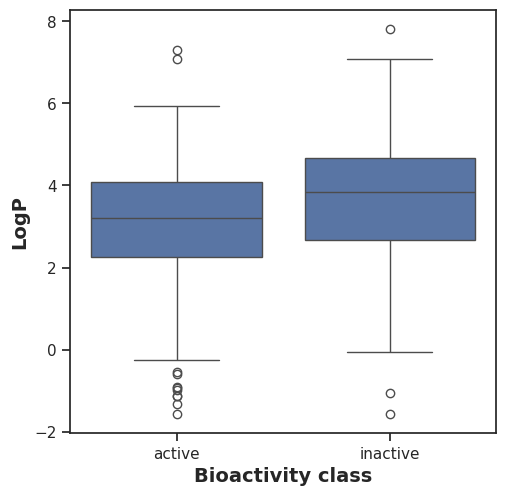

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [61]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,NaN,NaN,0.05,Different distribution (reject H0)


#### **NumHDonors**

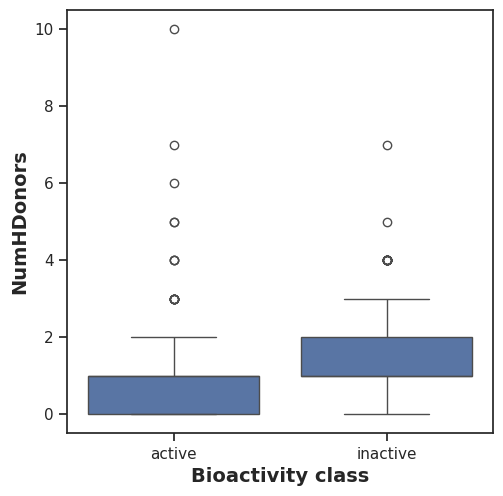

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [63]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,NaN,NaN,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

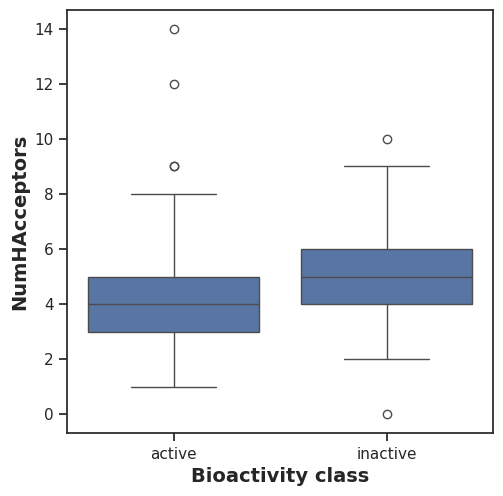

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [65]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,NaN,NaN,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [66]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_LogP.csv (deflated 6%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: bioactivity_data_preprocessed.csv (deflated 84%)
  adding: plot_MW_vs_LogP.pdf (deflated 8%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 6%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 39%)
